In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cardataset/Train'
valid_path = '/content/drive/MyDrive/cardataset/Test'

In [ ]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/cardataset/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cardataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cardataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 43s 34s/step - loss: 3.1604 - accuracy: 0.3229 - val_loss: 16.5701 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 19s 14s/step - loss: 12.8844 - accuracy: 0.3646 - val_loss: 2.1096 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 19s 14s/step - loss: 3.8312 - accuracy: 0.3438 - val_loss: 6.2942 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 19s 14s/step - loss: 8.1489 - accuracy: 0.2708 - val_loss: 11.4157 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 19s 14s/step - loss: 9.3906 - accuracy: 0.3125 - val_loss: 4.1949 - val_accuracy: 0.5517
Epoch 6/50
2/2 [==============================] - 19s 14s/step - loss: 3.9911 - accuracy: 0.4896 - val_loss: 1.5503 - val_accuracy: 0.5517
Epoch 7/50
2/2 [==============================] - 19s 14s/step - loss: 2.2384 - accuracy: 0.5312 - val_loss: 5.9088 - val_accuracy: 0.3276
Epoch 8/50
2/2 [========

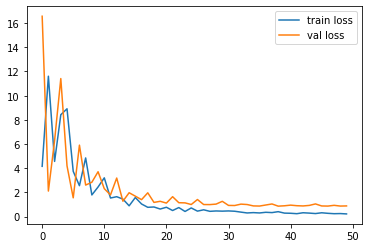

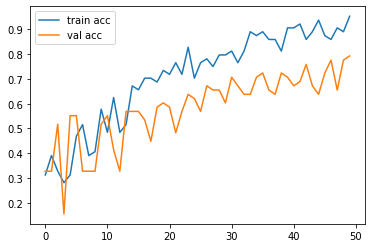

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[6.49462570e-04, 9.95118260e-01, 4.23230231e-03],
       [4.11416683e-03, 5.58970049e-02, 9.39988852e-01],
       [3.71339219e-03, 9.96021092e-01, 2.65441486e-04],
       [1.48880273e-01, 6.01229906e-01, 2.49889806e-01],
       [2.01908350e-02, 3.25978875e-01, 6.53830349e-01],
       [1.71555012e-01, 8.58461335e-02, 7.42598832e-01],
       [2.27278452e-02, 6.64448917e-01, 3.12823236e-01],
       [1.01677157e-01, 3.88954818e-01, 5.09368062e-01],
       [1.29698664e-01, 5.45077801e-01, 3.25223595e-01],
       [8.98204220e-04, 9.35921788e-01, 6.31799325e-02],
       [3.68234627e-02, 5.52576721e-01, 4.10599828e-01],
       [9.66497697e-03, 7.89481997e-01, 2.00852960e-01],
       [3.82142030e-02, 1.63227797e-01, 7.98557997e-01],
       [9.20595586e-01, 5.09113185e-02, 2.84930170e-02],
       [7.68383173e-03, 9.72926557e-01, 1.93896294e-02],
       [8.06091428e-01, 1.44397482e-01, 4.95110713e-02],
       [1.42409129e-03, 9.88781214e-01, 9.79463477e-03],
       [8.44896014e-04, 8.11070

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/cardataset/Test/lamborghini/11.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.00345214, 0.00671014, 0.98983765]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([False])

In [ ]:
from google.colab import files
files.download("model_resnet50.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>